# Visualization

In [226]:
# create a line plot
from pandas import read_excel
from matplotlib import pyplot

#### Line Plots

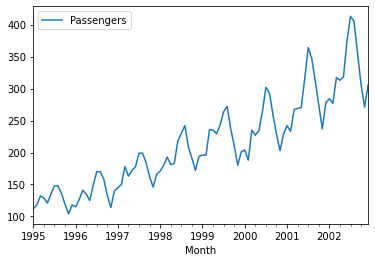

In [227]:
series = read_excel('Airlines+Data.xlsx', header=0, index_col=0,parse_dates=True)
series.plot()
pyplot.show()

#### Histogram Plots

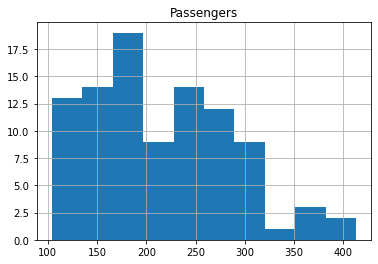

In [228]:
series.hist()
pyplot.show()

#### Density Plots

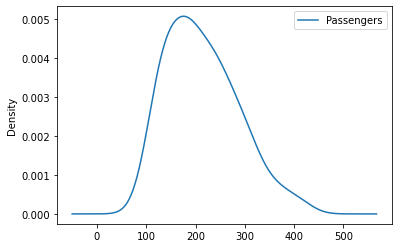

In [229]:
series.plot(kind='kde')
pyplot.show()

#### Lag plot

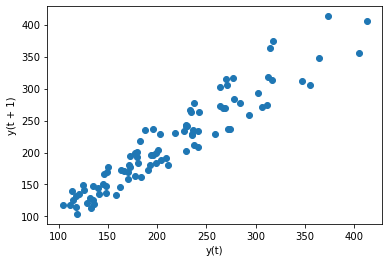

In [185]:
from pandas.plotting import lag_plot
lag_plot(series)
pyplot.show()

# Forecasting_Model based methods

In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

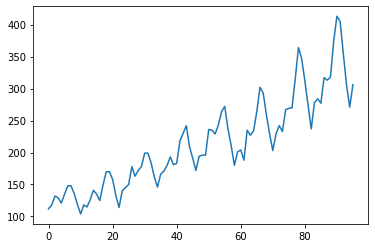

In [187]:
Walmart = pd.read_excel("Airlines+Data.xlsx")
Walmart.Passengers.plot()

In [188]:
Walmart

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [189]:
#Walmart['Date']

# Import label encoder 
#from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
#label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
#Walmart['month']= label_encoder.fit_transform(Walmart['month']) 
#Walmart.head()


In [190]:
Walmart["Date"] = pd.to_datetime(Walmart.Month,format="%b-%y")
#look for c standard format codes

# Extracting Day, weekday name, month name, year from the Date column using 
# Date functions from pandas 

Walmart["month"] = Walmart.Date.dt.strftime("%b") # month extraction
Walmart["year"] = Walmart.Date.dt.strftime("%Y") # year extraction
#Walmart["t"] = Walmart.Date.dt.strftime("%b")
#Walmart["t"].unique()
#Walmart["Day"] = Walmart.Date.dt.strftime("%d") # Day extraction
#Walmart["wkday"] = Walmart.Date.dt.strftime("%A") # weekday extraction

<AxesSubplot:xlabel='month', ylabel='year'>

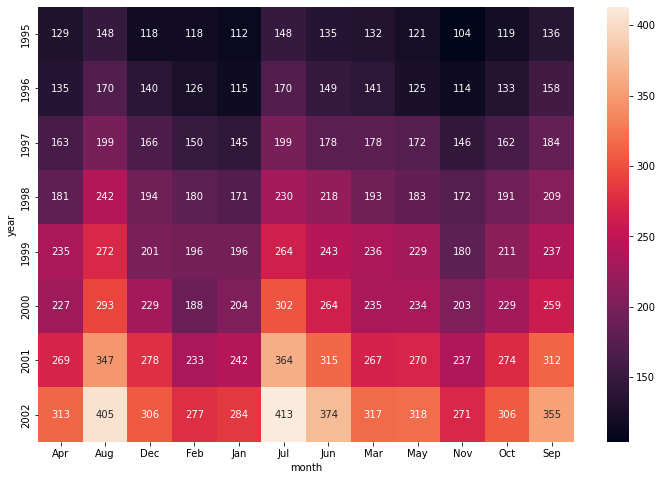

In [191]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=Walmart,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values


<AxesSubplot:xlabel='year', ylabel='Passengers'>

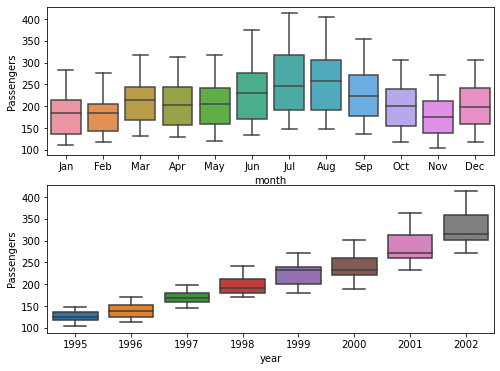

In [192]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=Walmart)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=Walmart)


<AxesSubplot:xlabel='year', ylabel='Passengers'>

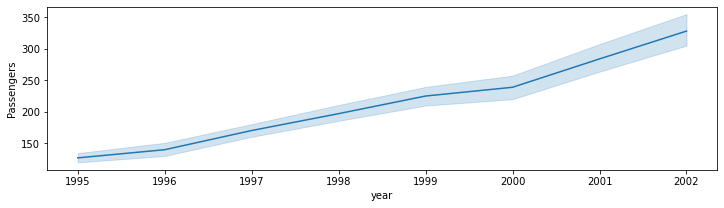

In [193]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=Walmart)

# Spliting Data

In [194]:
Train = Walmart.head(147)
Test = Walmart.tail(12)

In [195]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~month',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['month'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

116.21731171244092

In [196]:
Walmart

,Month,Passengers,Date,month,year
0,1995-01-01,112,1995-01-01,Jan,1995
1,1995-02-01,118,1995-02-01,Feb,1995
2,1995-03-01,132,1995-03-01,Mar,1995
3,1995-04-01,129,1995-04-01,Apr,1995
4,1995-05-01,121,1995-05-01,May,1995
...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,Aug,2002
92,2002-09-01,355,2002-09-01,Sep,2002
93,2002-10-01,306,2002-10-01,Oct,2002
94,2002-11-01,271,2002-11-01,Nov,2002


In [298]:
#Walmart=pd.get_dummies(Walmart,columns=['month'])
#pd.get_dummies(data,columns=['Weather'])
#Walmart

In [299]:
#X= Walmart(((month.abb,length = 96), month.abb,"==") + 0 )# Creating dummies for 12 months

#colnames(X)=month.abb # Assigning month names 
#View(X)

In [198]:
#Additive seasonality 

#add_sea = smf.ols('Passengers~month_Apr+month_Aug+month_Dec+month_Feb+month_Jan+month_Jul+month_Jun+month_Mar+month_May+month_Nov+month_Oct+month_Sep',data=Train).fit()
#pred_add_sea = pd.Series(add_sea.predict(Test[['month_Apr+month_Aug+month_Dec+month_Feb+month_Jan+month_Jul+month_Jun+month_Mar+month_May+month_Nov+month_Oct+month_Sep']]))
#rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
#rmse_add_sea

In [199]:
##Multiplicative Seasonality

#Mul_sea = smf.ols('year~month_Apr+month_Aug+month_Dec+month_Feb+month_Jan+month_Jul+month_Jun+month_Mar+month_May+month_Nov+month_Oct+month_Sep',data = Train).fit()
#pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
#rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
#rmse_Mult_sea

In [203]:
#model_full = smf.ols('Passengers~month_Apr+month_Aug+month_Dec+month_Feb+month_Jan+month_Jul+month_Jun+month_Mar+month_May+month_Nov+month_Oct+month_Sep',data=Walmart).fit()
model_full = smf.ols('Passengers~month',data=Walmart).fit()

In [207]:
pred_new  = pd.Series(linear_model.predict(Walmart))
pred_new

0     183.625
1     183.500
2     212.375
3     206.500
4     206.500
       ...   
91    259.500
92    231.250
93    203.125
94    178.375
95    204.000
Length: 96, dtype: float64

In [209]:
Walmart["forecasted_Passengers"] = pd.Series(pred_new)

In [210]:
Walmart

,Month,Passengers,Date,month,year,forecasted_Passengers
0,1995-01-01,112,1995-01-01,Jan,1995,183.625
1,1995-02-01,118,1995-02-01,Feb,1995,183.500
2,1995-03-01,132,1995-03-01,Mar,1995,212.375
3,1995-04-01,129,1995-04-01,Apr,1995,206.500
4,1995-05-01,121,1995-05-01,May,1995,206.500
...,...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,Aug,2002,259.500
92,2002-09-01,355,2002-09-01,Sep,2002,231.250
93,2002-10-01,306,2002-10-01,Oct,2002,203.125
94,2002-11-01,271,2002-11-01,Nov,2002,178.375


# Sampling And Transformation

#### Upsampling Data

In [211]:
# upsample to daily intervals
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

C:\Users\Admin\AppData\Local\Temp/ipykernel_1164/2820575016.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [213]:
series = read_excel('Airlines+Data.xlsx', header=0, index_col=0, parse_dates=True,squeeze=True)
series

Month
1995-01-01    112
1995-02-01    118
1995-03-01    132
1995-04-01    129
1995-05-01    121
             ... 
2002-08-01    405
2002-09-01    355
2002-10-01    306
2002-11-01    271
2002-12-01    306
Name: Passengers, Length: 96, dtype: int64

In [214]:
upsampled = series.resample('D').mean()
print(upsampled.head(32))

Month
1995-01-01    112.0
1995-01-02      NaN
1995-01-03      NaN
1995-01-04      NaN
1995-01-05      NaN
1995-01-06      NaN
1995-01-07      NaN
1995-01-08      NaN
1995-01-09      NaN
1995-01-10      NaN
1995-01-11      NaN
1995-01-12      NaN
1995-01-13      NaN
1995-01-14      NaN
1995-01-15      NaN
1995-01-16      NaN
1995-01-17      NaN
1995-01-18      NaN
1995-01-19      NaN
1995-01-20      NaN
1995-01-21      NaN
1995-01-22      NaN
1995-01-23      NaN
1995-01-24      NaN
1995-01-25      NaN
1995-01-26      NaN
1995-01-27      NaN
1995-01-28      NaN
1995-01-29      NaN
1995-01-30      NaN
1995-01-31      NaN
1995-02-01    118.0
Freq: D, Name: Passengers, dtype: float64


##### interpolate the missing value

Month
1995-01-01    112.000000
1995-01-02    112.193548
1995-01-03    112.387097
1995-01-04    112.580645
1995-01-05    112.774194
1995-01-06    112.967742
1995-01-07    113.161290
1995-01-08    113.354839
1995-01-09    113.548387
1995-01-10    113.741935
1995-01-11    113.935484
1995-01-12    114.129032
1995-01-13    114.322581
1995-01-14    114.516129
1995-01-15    114.709677
1995-01-16    114.903226
1995-01-17    115.096774
1995-01-18    115.290323
1995-01-19    115.483871
1995-01-20    115.677419
1995-01-21    115.870968
1995-01-22    116.064516
1995-01-23    116.258065
1995-01-24    116.451613
1995-01-25    116.645161
1995-01-26    116.838710
1995-01-27    117.032258
1995-01-28    117.225806
1995-01-29    117.419355
1995-01-30    117.612903
1995-01-31    117.806452
1995-02-01    118.000000
Freq: D, Name: Passengers, dtype: float64


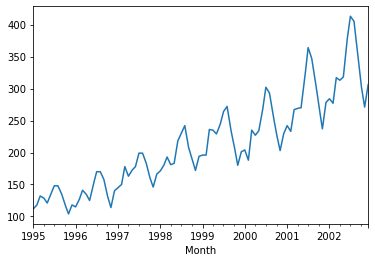

In [215]:
interpolated = upsampled.interpolate(method='linear')
print(interpolated.head(32))
interpolated.plot()
pyplot.show()

#### Downsampling Data

In [217]:
resample = series.resample('Q')
quarterly_mean_sales = resample.mean()

# Transformations

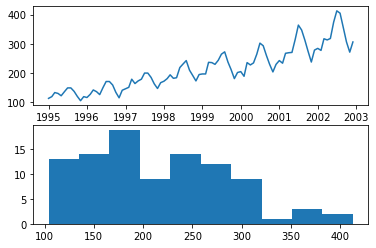

In [218]:
# line plot
pyplot.subplot(211)
pyplot.plot(series)
# histogram
pyplot.subplot(212)
pyplot.hist(series)
pyplot.show()

#### Square Root Transform

In [219]:
from pandas import read_csv
from pandas import DataFrame
from numpy import sqrt
from matplotlib import pyplot

In [220]:
dataframe = DataFrame(series.values)
dataframe.columns = ['Passengers']
dataframe['Passengers'] = sqrt(dataframe['Passengers'])

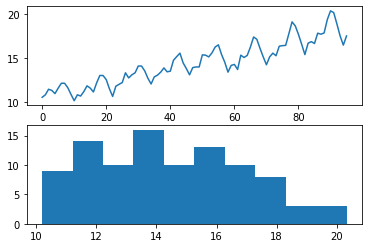

In [222]:
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['Passengers'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['Passengers'])
pyplot.show()

#### Log Transform

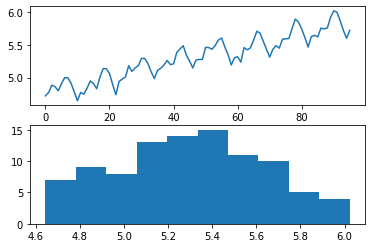

In [223]:
from numpy import log
dataframe = DataFrame(series.values)
dataframe.columns = ['Passengers']
dataframe['Passengers'] = log(dataframe['Passengers'])

# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['Passengers'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['Passengers'])
pyplot.show()

Month
1995-03-31    120.666667
1995-06-30    128.333333
1995-09-30    144.000000
1995-12-31    113.666667
1996-03-31    127.333333
Freq: Q-DEC, Name: Passengers, dtype: float64


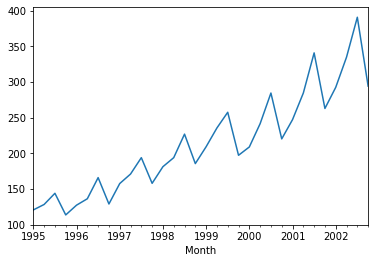

In [224]:
print(quarterly_mean_sales.head())
quarterly_mean_sales.plot()
pyplot.show()

# Forecasting Model_Arima

In [237]:
# Import libraries
from pandas import read_csv
from matplotlib import pyplot
from numpy import sqrt
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [239]:
series = read_excel('Airlines+Data.xlsx', header=0, index_col=0, parse_dates=True)
series

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [240]:
# separate out a validation dataset
split_point = len(series) - 10
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 86, Validation 10


#### Persistence/ Base model

In [241]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [242]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=230.000, Expected=242.000
>Predicted=242.000, Expected=209.000
>Predicted=209.000, Expected=191.000
>Predicted=191.000, Expected=172.000
>Predicted=172.000, Expected=194.000
>Predicted=194.000, Expected=196.000
>Predicted=196.000, Expected=196.000
>Predicted=196.000, Expected=236.000
>Predicted=236.000, Expected=235.000
>Predicted=235.000, Expected=229.000
>Predicted=229.000, Expected=243.000
>Predicted=243.000, Expected=264.000
>Predicted=264.000, Expected=272.000
>Predicted=272.000, Expected=237.000
>Predicted=237.000, Expected=211.000
>Predicted=211.000, Expected=180.000
>Predicted=180.000, Expected=201.000
>Predicted=201.000, Expected=204.000
>Predicted=204.000, Expected=188.000
>Predicted=188.000, Expected=235.000
>Predicted=235.000, Expected=227.000
>Predicted=227.000, Expected=234.000
>Predicted=234.000, Expected=264.000
>Predicted=264.000, Expected=302.000
>Predicted=302.000, Expected=293.000
>Predicted=293.000, Expected=259.000
>Predicted=259.000, Expected=229.000
>

#### ARIMA Hyperparameters


In [297]:
# grid search ARIMA parameters for a time series

import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse
rmse

71.93702681844837

#### Grid search for p,d,q values

In [244]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [245]:
# load dataset
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
#p_values = range(0, 5)
#d_values = range(0, 5)
#q_values = range(0, 5)
warnings.filterwarnings("ignore")
#evaluate_models(train.values, p_values, d_values, q_values)

#### Build Model based on the optimized values

In [246]:
# save finalized model to file
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy

In [247]:
# load data
train = read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

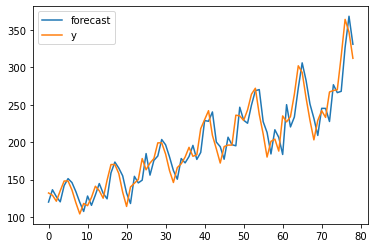

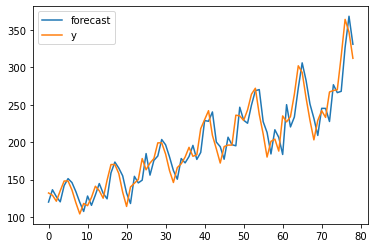

In [248]:
# fit model
model = ARIMA(X, order=(3,1,0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1, 79)

In [249]:
#Error on the test data
val=pd.read_csv('validation.csv',header=None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse

71.93702681844837

#### Combine train and test data and build final model

In [250]:
# fit model
series = read_excel('Airlines+Data.xlsx', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

In [251]:
model = ARIMA(X, order=(3,1,0))
model_fit = model.fit()

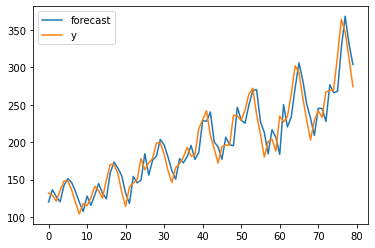

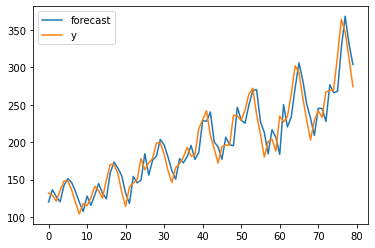

In [252]:
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1,80)

In [253]:
forecast

array([271.54441648, 272.96712702, 277.13666844, 280.43787558,
       282.22664442, 283.52392406, 285.09878005, 287.00415221,
       288.98769431, 290.89385954])

# Forecasting_Data Driven Models

In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

# Splitting data

In [265]:
Walmart = pd.read_excel("Airlines+Data.xlsx")
Walmart.shape

(96, 2)

In [270]:
Train = Walmart.head(80)
Test = Walmart.tail(16)

In [271]:
Test

,Month,Passengers
80,2001-09-01,312
81,2001-10-01,274
82,2001-11-01,237
83,2001-12-01,278
84,2002-01-01,284
85,2002-02-01,277
86,2002-03-01,317
87,2002-04-01,313
88,2002-05-01,318
89,2002-06-01,374


# Moving Average 


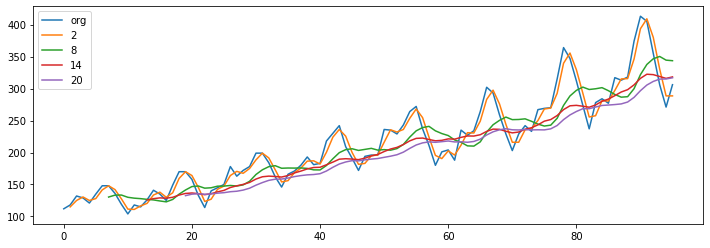

In [273]:
plt.figure(figsize=(12,4))
Walmart.Passengers.plot(label="org")
for i in range(2,24,6):
    Walmart["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

# Time series decomposition plot 


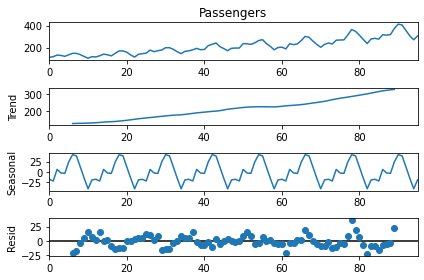

In [274]:
decompose_ts_add = seasonal_decompose(Walmart.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

# ACF plots and PACF plots

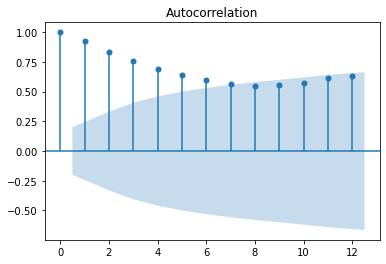

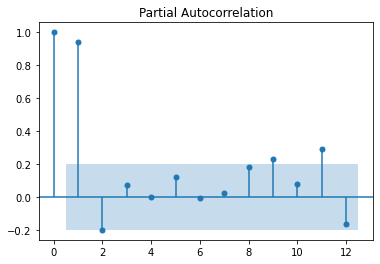

In [276]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(Walmart.Passengers,lags=12)
tsa_plots.plot_pacf(Walmart.Passengers,lags=12)
plt.show()


### Evaluation Metric MAPE

In [277]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

### Simple Exponential Method

In [278]:
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers) 

11.375850554268187

# Holt method 

In [279]:
# Holt method 
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers) 

51.93443984362991

### Holts winter exponential smoothing with additive seasonality and additive trend


In [280]:
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers) 

7.6088695058251945

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [281]:
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers)

3.217851940640948

## Final Model by combining train and test


In [282]:
hwe_model_add_add = ExponentialSmoothing(Walmart["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit()

In [283]:
#Forecasting for next 10 time periods
hwe_model_add_add.forecast(10)

96     319.235234
97     311.528314
98     350.278575
99     346.984779
100    351.844786
101    403.925571
102    440.566766
103    427.446614
104    376.628343
105    329.767622
dtype: float64